# Least Squares

In [2]:
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import clear_output, display

In [3]:
def poly_fit(x, y, n):
    m = np.size(x)
    A = np.zeros([n+1,n+1])
    b = np.zeros(n+1)
    A_tmp = np.zeros(2*n+1)
    for i in range(2*n+1):
        for j in range(m):
            A_tmp[i] += x[j]**i
            if (i < n+1):
                b[i] += x[j]**i*y[j]
    for i in range(n+1):
        A[i] = A_tmp[i:i+n+1]
    a = np.linalg.solve(A, b)
    return a

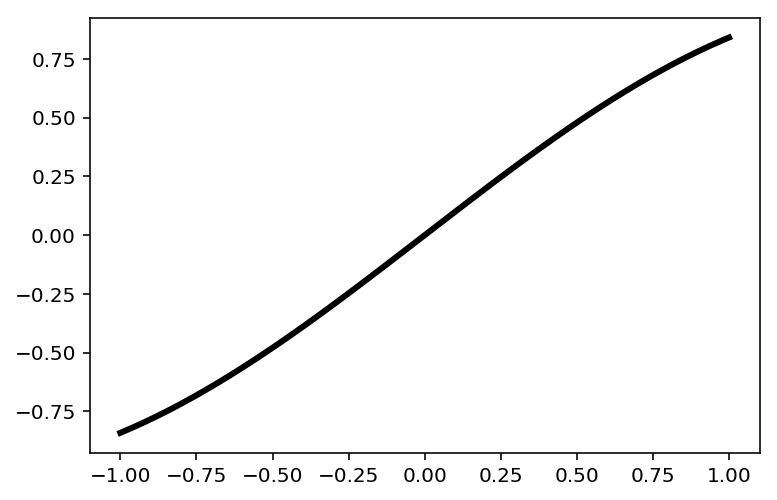

In [4]:
def plot_fun(fun, a, b, c='k'):
    num = 200
    x = np.linspace(a, b, num+1)
    y = np.zeros(num+1)
    for i in range(num+1):
        y[i] = fun(x[i])
    plt.plot(x, y, c, linewidth=3)
    
plot_fun(np.sin, -1, 1)

[-7.29981914e+00  2.29306317e+01 -2.24450878e+01  1.17315009e+01
 -3.47843691e+00  6.17444761e-01 -6.46946432e-02  3.67349725e-03
 -8.68043007e-05]


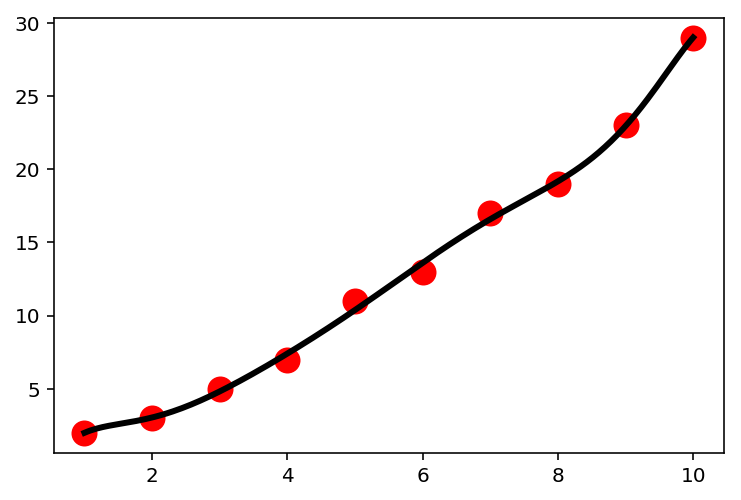

In [5]:
x = np.array([1,2,3,4,5,6,7,8,9,10])
y = np.array([2,3,5,7,11,13,17,19,23,29])

plt.plot(x, y, 'ro', markersize=12, linewidth=3)
a = poly_fit(x, y, 8)
print (a)

def fitting_fun(a, x):
    n = np.size(a)
    y = a[n-1]
    for i in range(n-1):
        y = y*x + a[n-2-i]
    return y
#print (fitting_fun(a,0))
def fun(x):
    return fitting_fun(a,x)
plot_fun(fun, 1, 10)

In [6]:
3/8*(3*np.log(4/3)+3*np.log(5/3) + np.log(2))/3


0.3860837836516575

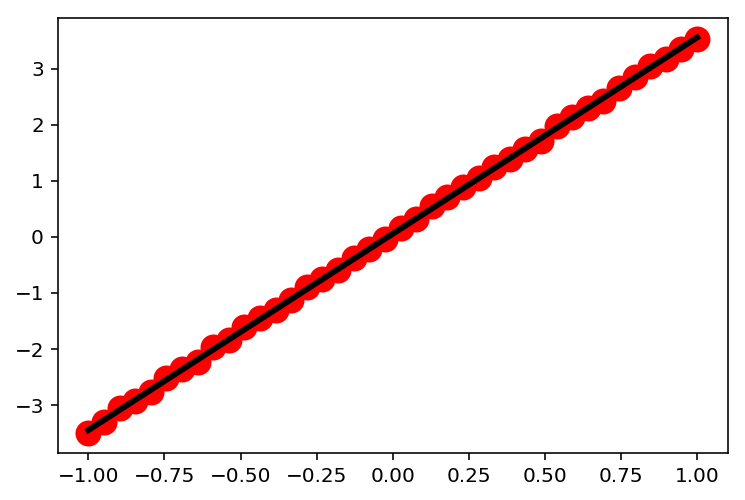

In [7]:
def fun1(x):
    #return x**3 - x**2 + x
    return 3.5*x
    
m = 40
x = np.linspace(-1,1,m)
y = np.zeros(m)
for i in range(m):
    y[i] = fun1(x[i])  
y = y + 0.1*np.random.rand(m)

plt.plot(x, y, 'ro', markersize=12, linewidth=3)
a = poly_fit(x, y, 1)


plot_fun(fun, -1, 1)

[-1.73728814  2.55084746]
[0.43801653 1.08953168 0.16391185]


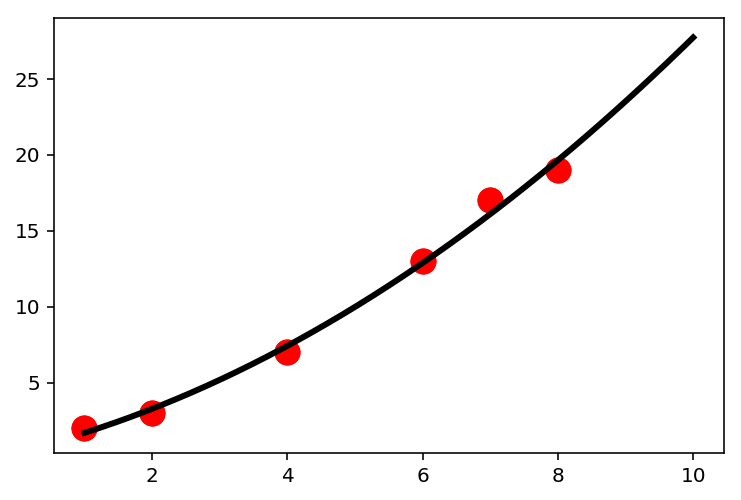

In [8]:
x = np.array([1,2,4,6,7,8])
y = np.array([2,3,7,13,17,19])

plt.plot(x, y, 'ro', markersize=12, linewidth=3)
a = poly_fit(x, y, 1)
print (a)

plt.plot(x, y, 'ro', markersize=12, linewidth=3)
a = poly_fit(x, y, 2)
print (a)


def fitting_fun(a, x):
    n = np.size(a)
    y = a[n-1]
    for i in range(n-1):
        y = y*x + a[n-2-i]
    return y
#print (fitting_fun(a,0))
def fun(x):
    return fitting_fun(a,x)
plot_fun(fun, 1, 10)

In [9]:
print(np.polyfit(x,y,1))
print(np.polyfit(x,y,2))

[ 2.55084746 -1.73728814]
[0.16391185 1.08953168 0.43801653]


[0.85714286 1.07142857]
[1.07142857 0.85714286]


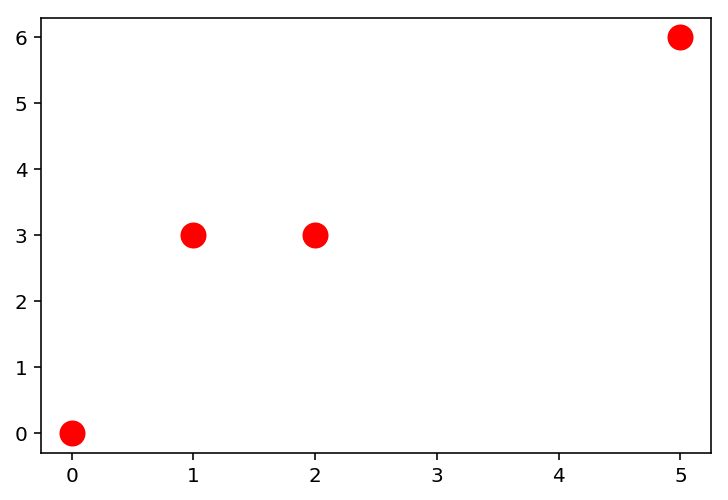

In [10]:
x = np.array([0,1,2,5])
y = np.array([0,3,3,6])
plt.plot(x, y, 'ro', markersize=12, linewidth=3)
a = poly_fit(x, y, 1)
print (a)
print(np.polyfit(x,y,1))

In [11]:
from sympy import *

init_printing()

In [12]:
x = Matrix([[1],[2],[4],[6],[7],[8]])
y = Matrix([[2],[3],[7],[13],[17],[19]])

In [13]:
A1 = Matrix([[1, 1],[1, 2],[1, 4],[1, 6],[1, 7],[1, 8]])
A2 = Matrix([[1, 1, 1],[1, 2, 4],[1, 4, 16],[1, 6, 36],[1, 7, 49],[1, 8, 64]])

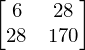

In [14]:
A = A1.transpose()*A1
A

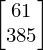

In [15]:
b = A1.transpose()*y
b

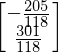

In [16]:
a = A.inv()*b
a

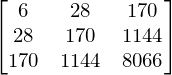

In [17]:
A = A2.transpose()*A2
A

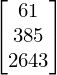

In [18]:
b = A2.transpose()*y
b

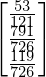

In [19]:
a = A.inv()*b
a

In [20]:
A3 = Matrix([[1, 0],[1, 1],[1, 2],[1, 5]])
y = Matrix([[0],[3],[3],[6]])
A = A3.transpose()*A3
b = A3.transpose()*y
a = A.inv()*b
print(A,b,a)

Matrix([[4, 8], [8, 30]]) Matrix([[12], [39]]) Matrix([[6/7], [15/14]])


In [21]:
A = np.array([[-4, 14, 0],[-5,13,0],[-1,0,2]])
A

array([[-4, 14,  0],
       [-5, 13,  0],
       [-1,  0,  2]])

In [22]:
x0 = np.array([1,1,1])
x1 = np.dot(A, x0)
print (x1)

[10  8  1]


In [23]:
y1 = x1/np.linalg.norm(x1)
y1

array([0.77849894, 0.62279916, 0.07784989])

In [24]:
lambda1 = np.dot(x0,np.dot(A,x0))/np.dot(x0,x0)
print (lambda1)

6.333333333333333


In [25]:
np.linalg.eig(A)

(array([2., 6., 3.]), array([[ 0.        ,  0.79740048,  0.66666667],
        [ 0.        ,  0.56957177,  0.33333333],
        [ 1.        , -0.19935012, -0.66666667]]))

In [26]:
np.linalg.norm(np.array([10,8,1]))**2

In [27]:
np.dot(A,np.array([10,8,1]))

array([72, 54, -8])

In [28]:
np.dot(Out[54],np.array([10,8,1]))

KeyError: 54

In [ ]:
1144/165

In [ ]:
104/15

In [ ]:
np.dot(np.array([10,8,1]),np.dot(A,np.array([10,8,1])))


In [32]:
A4 = Matrix([[1, 0, 0],[1, 1, 1],[1, 2, 4],[1, 5, 25]])
y = Matrix([[0],[3],[3],[6]])
A = A4.transpose()*A4
b = A4.transpose()*y
a = A.inv()*b
print(A,b,a)
print(A)
print(b)
print(a)

Matrix([[4, 8, 30], [8, 30, 134], [30, 134, 642]]) Matrix([[12], [39], [165]]) Matrix([[63/181], [705/362], [-30/181]])
Matrix([[4, 8, 30], [8, 30, 134], [30, 134, 642]])
Matrix([[12], [39], [165]])
Matrix([[63/181], [705/362], [-30/181]])


In [33]:
x = Symbol('x')

In [34]:
solve(x -3, x)

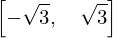

In [35]:
solve(x**2 - 3, x)

In [36]:
solve(x**2 - 2.66*x + 0.488 - 0.64**2, x)

In [37]:
(x - factor1/5)*(x - 61/25) - 256/625

In [38]:
simplify(Out[37])

In [39]:
expand(Out[37])

In [40]:
solve(Out[39], x)

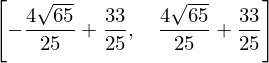

In [41]:
solve(10000*x**2 - 26400*x + 784, x)

In [42]:
expand((x - 1.16)*(x-1.48) - 1.28**2)

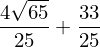

In [43]:
Out[41][1]

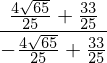

In [44]:
Out[41][1]/Out[41][0]

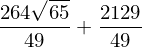

In [45]:
simplify(Out[44])

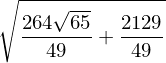

In [46]:
sqrt(Out[45])

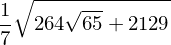

In [47]:
simplify(Out[46])

In [48]:
f(x)

NameError: name 'f' is not defined